## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)   
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.compile(optimizer='sgd',loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 280s 6ms/step - loss: 2.0462 - acc: 0.2660 - val_loss: 1.9281 - val_acc: 0.3106
Epoch 2/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.8790 - acc: 0.3344 - val_loss: 1.8430 - val_acc: 0.3457
Epoch 3/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.8149 - acc: 0.3573 - val_loss: 1.8674 - val_acc: 0.3286
Epoch 4/500
50000/50000 [==============================] - 18s 351us/step - loss: 1.7723 - acc: 0.3742 - val_loss: 1.7819 - val_acc: 0.3705
Epoch 5/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.7359 - acc: 0.3888 - val_loss: 1.7245 - val_acc: 0.3908
Epoch 6/500
50000/50000 [==============================] - 17s 348us/step - loss: 1.7044 - acc: 0.4018 - val_loss: 1.7031 - val_acc: 0.3938
Epoch 7/500
50000/50000 [==============================] - 18s 354us/step - loss: 1.6781 - acc: 0.4109 - val_lo

Epoch 59/500
50000/50000 [==============================] - 18s 351us/step - loss: 1.1823 - acc: 0.5850 - val_loss: 1.4064 - val_acc: 0.5008
Epoch 60/500
50000/50000 [==============================] - 17s 350us/step - loss: 1.1711 - acc: 0.5919 - val_loss: 1.3255 - val_acc: 0.5310
Epoch 61/500
50000/50000 [==============================] - 18s 354us/step - loss: 1.1621 - acc: 0.5946 - val_loss: 1.3994 - val_acc: 0.5085
Epoch 62/500
50000/50000 [==============================] - 18s 352us/step - loss: 1.1606 - acc: 0.5923 - val_loss: 1.4284 - val_acc: 0.4995
Epoch 63/500
50000/50000 [==============================] - 17s 341us/step - loss: 1.1582 - acc: 0.5950 - val_loss: 1.4540 - val_acc: 0.4889
Epoch 64/500
50000/50000 [==============================] - 18s 351us/step - loss: 1.1501 - acc: 0.5969 - val_loss: 1.5001 - val_acc: 0.4620
Epoch 65/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.1469 - acc: 0.5991 - val_loss: 1.3572 - val_acc: 0.5175
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 17s 350us/step - loss: 0.8722 - acc: 0.6980 - val_loss: 1.3905 - val_acc: 0.5330
Epoch 118/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.8559 - acc: 0.7029 - val_loss: 1.4676 - val_acc: 0.5120
Epoch 119/500
50000/50000 [==============================] - 169s 3ms/step - loss: 0.8536 - acc: 0.7016 - val_loss: 1.4496 - val_acc: 0.5171
Epoch 120/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.8541 - acc: 0.7035 - val_loss: 1.6068 - val_acc: 0.4919
Epoch 121/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.8428 - acc: 0.7075 - val_loss: 1.6450 - val_acc: 0.4858
Epoch 122/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.8386 - acc: 0.7084 - val_loss: 1.4401 - val_acc: 0.5142
Epoch 123/500
50000/50000 [==============================] - 13s 266us/step - loss: 0.8403 - acc: 0.7100 - val_loss: 1.3821 - val_acc: 0.5382
Epoch 1

Epoch 175/500
50000/50000 [==============================] - 13s 262us/step - loss: 0.5737 - acc: 0.8058 - val_loss: 1.7493 - val_acc: 0.4958
Epoch 176/500
50000/50000 [==============================] - 13s 260us/step - loss: 0.5726 - acc: 0.8060 - val_loss: 1.5813 - val_acc: 0.5361
Epoch 177/500
50000/50000 [==============================] - 13s 260us/step - loss: 0.5676 - acc: 0.8075 - val_loss: 1.5938 - val_acc: 0.5300
Epoch 178/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.5751 - acc: 0.8034 - val_loss: 1.6226 - val_acc: 0.5261
Epoch 179/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.5741 - acc: 0.8083 - val_loss: 1.6283 - val_acc: 0.5253
Epoch 180/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.5526 - acc: 0.8120 - val_loss: 1.6357 - val_acc: 0.5294
Epoch 181/500
50000/50000 [==============================] - 13s 262us/step - loss: 0.5512 - acc: 0.8124 - val_loss: 1.7261 - val_acc: 0.5020
Epoch 

Epoch 233/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.3275 - acc: 0.8969 - val_loss: 1.8399 - val_acc: 0.5397
Epoch 234/500
50000/50000 [==============================] - 17s 344us/step - loss: 0.3058 - acc: 0.9039 - val_loss: 1.8913 - val_acc: 0.5327
Epoch 235/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.3405 - acc: 0.8925 - val_loss: 1.9510 - val_acc: 0.5190
Epoch 236/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.3167 - acc: 0.8995 - val_loss: 2.0267 - val_acc: 0.5051
Epoch 237/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.3083 - acc: 0.9057 - val_loss: 2.1348 - val_acc: 0.4966
Epoch 238/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.3013 - acc: 0.9073 - val_loss: 1.8856 - val_acc: 0.5386
Epoch 239/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.3022 - acc: 0.9073 - val_loss: 2.2521 - val_acc: 0.5004
Epoch 

Epoch 291/500
50000/50000 [==============================] - 17s 346us/step - loss: 0.1316 - acc: 0.9695 - val_loss: 2.2383 - val_acc: 0.5267
Epoch 292/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.1113 - acc: 0.9764 - val_loss: 2.7114 - val_acc: 0.4695
Epoch 293/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.2274 - acc: 0.9428 - val_loss: 2.4263 - val_acc: 0.4935
Epoch 294/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.1225 - acc: 0.9716 - val_loss: 2.2043 - val_acc: 0.5458
Epoch 295/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.1096 - acc: 0.9771 - val_loss: 2.2408 - val_acc: 0.5383
Epoch 296/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.0924 - acc: 0.9828 - val_loss: 2.3268 - val_acc: 0.5364
Epoch 297/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.0911 - acc: 0.9822 - val_loss: 2.3209 - val_acc: 0.5388
Epoch 

Epoch 349/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.0427 - acc: 0.9960 - val_loss: 2.5428 - val_acc: 0.5455
Epoch 350/500
50000/50000 [==============================] - 17s 344us/step - loss: 0.0364 - acc: 0.9968 - val_loss: 2.5253 - val_acc: 0.5460
Epoch 351/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.0340 - acc: 0.9973 - val_loss: 2.5617 - val_acc: 0.5430
Epoch 352/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.0326 - acc: 0.9972 - val_loss: 2.5485 - val_acc: 0.5463
Epoch 353/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.0319 - acc: 0.9976 - val_loss: 2.5769 - val_acc: 0.5444
Epoch 354/500
50000/50000 [==============================] - 17s 344us/step - loss: 0.0306 - acc: 0.9977 - val_loss: 2.6138 - val_acc: 0.5454
Epoch 355/500
50000/50000 [==============================] - 17s 344us/step - loss: 0.0298 - acc: 0.9978 - val_loss: 2.6020 - val_acc: 0.5480
Epoch 

Epoch 407/500
50000/50000 [==============================] - 17s 350us/step - loss: 0.0148 - acc: 0.9995 - val_loss: 2.8085 - val_acc: 0.5446
Epoch 408/500
50000/50000 [==============================] - 17s 349us/step - loss: 0.0145 - acc: 0.9996 - val_loss: 2.8221 - val_acc: 0.5422
Epoch 409/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.0141 - acc: 0.9996 - val_loss: 2.8560 - val_acc: 0.5399
Epoch 410/500
50000/50000 [==============================] - 17s 350us/step - loss: 0.0139 - acc: 0.9997 - val_loss: 2.8629 - val_acc: 0.5445
Epoch 411/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.0137 - acc: 0.9997 - val_loss: 2.8334 - val_acc: 0.5469
Epoch 412/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.0135 - acc: 0.9997 - val_loss: 2.8320 - val_acc: 0.5467
Epoch 413/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.0133 - acc: 0.9997 - val_loss: 2.8456 - val_acc: 0.5466
Epoch 

Epoch 465/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.0073 - acc: 0.9999 - val_loss: 3.0446 - val_acc: 0.5463
Epoch 466/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 3.0414 - val_acc: 0.5450
Epoch 467/500
50000/50000 [==============================] - 17s 336us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 3.0456 - val_acc: 0.5458
Epoch 468/500
50000/50000 [==============================] - 17s 338us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 3.0458 - val_acc: 0.5452
Epoch 469/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.0509 - val_acc: 0.5446
Epoch 470/500
50000/50000 [==============================] - 17s 336us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.0621 - val_acc: 0.5461
Epoch 471/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 3.0717 - val_acc: 0.5437
Epoch 

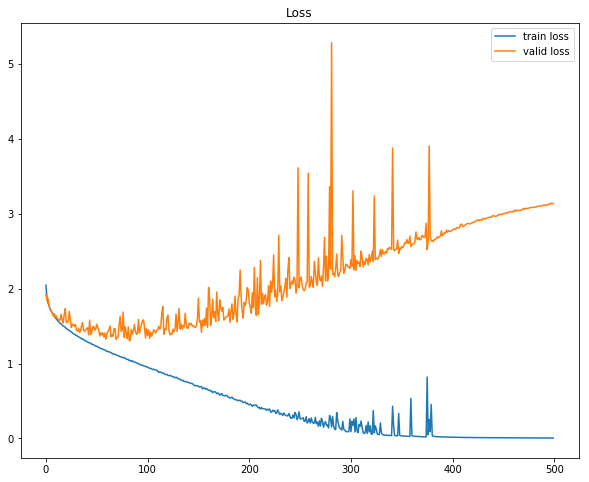

Text(0.5,1,'Accuracy')

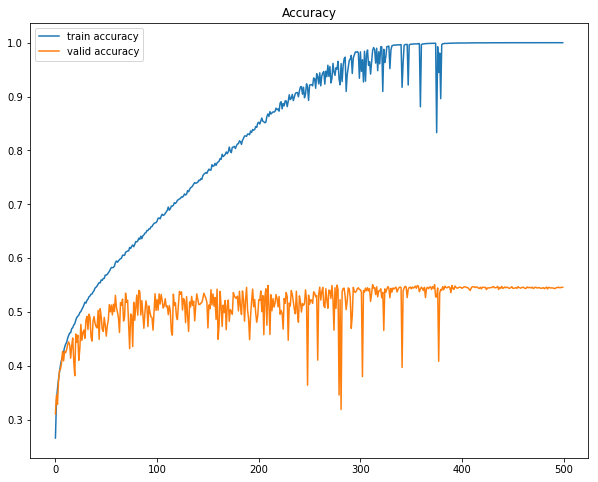

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.figure(figsize=(10,8))
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(10,8))
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
#plt.show()